In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
from sparse_rf.algs.core import min_wl2, min_l2
from sparse_rf.modules import make_X, make_W, make_A
from sparse_rf.util import *
from sparse_rf.util.fns import *

In [3]:
m = 1000
d = 100
q = 2
active = fourier

ratio_train = 0.7

In [4]:
X = make_X(d, m, dist=uniform)
X_train = X[:int(m*ratio_train), :]
X_test = X[int(m*ratio_train):, :]

In [5]:
y = fn12(X.T)
y_train = y[:int(m*ratio_train)]
y_test = y[int(m*ratio_train):]

In [6]:
Ns = np.arange(1, 10201, 200)

In [7]:
%%time
results_dense_l2 = []
for N in Ns:
    res = []
    for _ in range(5):
        W = make_W(d, d, N=N)
        A_train = make_A(X_train, W, active=active)
        A_test = make_A(X_test, W, active=active)
        c = min_l2(A_train, y_train)
        res.append(np.linalg.norm(A_test@c - y_test) / len(y_test))
    results_dense_l2.append(res)

CPU times: user 53min 11s, sys: 42.9 s, total: 53min 54s
Wall time: 9min 10s


In [8]:
%%time
results_sparse_l2 = []
for N in Ns:
    res = []
    for _ in range(5):
        W = make_W(d, q=1, N=N)
        A_train = make_A(X_train, W, active=active)
        A_test = make_A(X_test, W, active=active)
        c = min_l2(A_train, y_train)
        res.append(np.linalg.norm(A_test@c - y_test) / len(y_test))
    results_sparse_l2.append(res)

CPU times: user 50min 33s, sys: 43 s, total: 51min 16s
Wall time: 8min 37s


[2.8876682713402717, 4.407755564609721, 8.21406282717182, 4.571539698988632, 3.908294003275686, 3.483693601007649, 3.410925248591952, 3.3499555937935312, 3.2249977253338016, 3.1782359874241504, 3.16202319767685, 3.144773360602848, 3.093505862651315, 3.0983370123580807, 3.0853946694079175, 3.0679363176390133, 3.027521290028057, 3.079551234861314, 2.992339031318648, 3.011397780056117, 3.06688812922526, 2.982060302791228, 2.9911513199554864, 3.007583905270695, 2.985572443927068, 3.010661309720818, 2.989496465687301, 2.9976144464578245, 2.932986068785808, 2.9664045129246426, 3.0043136643359, 2.9340387804640313, 2.9643402400457015, 2.943154269543345, 2.9366325472682573, 2.9772513644571204, 2.965961328945105, 2.996039092207936, 2.9387433336580964, 2.970138902573153, 2.933242261215832, 2.9277691375735366, 2.9556778493441307, 2.9315196551403515, 2.919381701583474, 2.933311159201844, 2.939491222369288, 2.932730990033765, 2.9237015622167575, 2.947494070361403, 2.932837769811923]


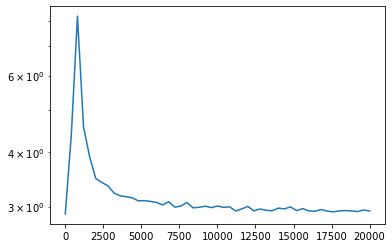

In [13]:
print([np.mean(res) for res in results_dense_l2])
plt.semilogy(2*Ns, [np.mean(res) for res in results_dense_l2])

[0.2964415875571124, 0.011048684464236857, 0.1037858082234975, 0.05436191314230746, 0.04623229503518359, 0.047113698910079306, 0.04461323468298652, 0.04124347080645054, 0.04630626627960365, 0.044411069271971915, 0.04106322006448089, 0.04263073801973257, 0.03722002875810332, 0.040054612097958665, 0.04146453079873523, 0.03992160718468136, 0.03874693350595009, 0.04193057626589467, 0.04118368484532682, 0.03999820664715786, 0.038993056545904535, 0.040696223195566775, 0.04094419572610678, 0.03770196144993314, 0.04057047756897451, 0.03958332362641267, 0.04115775853425288, 0.038950574768859644, 0.040517287402056526, 0.04291365879194137, 0.0374384213468228, 0.03683434683837848, 0.040585714874754444, 0.04074673987785393, 0.041974868310755725, 0.042225358087131404, 0.04085985027482181, 0.03901671552381034, 0.0404059266741851, 0.039594888967649775, 0.04050006319517978, 0.04007034837168644, 0.03844666425432662, 0.038613170583445225, 0.039098034623807815, 0.0407091088822648, 0.04111961293312503, 0.0

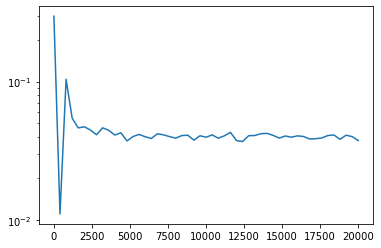

In [14]:
print([np.mean(res) for res in results_sparse_l2])
plt.semilogy(2*Ns, [np.mean(res) for res in results_sparse_l2])

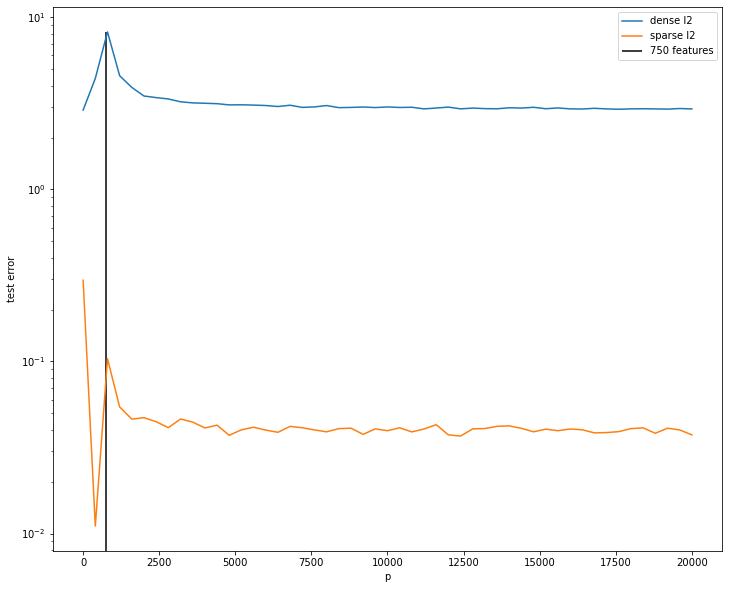

In [15]:
plt.figure(figsize=(12, 10))
plt.semilogy(2*Ns, [np.mean(res) for res in results_dense_l2], label="dense l2")
plt.semilogy(2*Ns, [np.mean(res) for res in results_sparse_l2], label="sparse l2")
plt.vlines(750, ymin=0, ymax=max([np.mean(res) for res in results_dense_l2]), color="black", label="750 features")
plt.xlabel("p")
plt.ylabel("test error")
plt.legend()
plt.show()